In [1]:
%matplotlib inline

In [7]:
from LoopStructural import GeologicalModel
from LoopStructural.datasets import load_claudius
from LoopStructural.visualisation import LavaVuModelViewer

import pandas as pd
import numpy as np

data, bb = load_claudius()
data = data.reset_index()

data.loc[:,'val']*=-1
data.loc[:,['nx','ny','nz']]*=-1

#data.loc[792,'feature_name'] = 'strati2'
#data.loc[792,['nx','ny','nz']] = [0,0,1]
#data.loc[792,'val'] = 0

model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)

#strati2_ = model.create_and_add_foliation('strati2',
                             # interpolatortype='PLI',
                              # nelements=1e4,
                               #solver='pyamg'
                              #)
#uc = model.add_unconformity(strati2_,1)

strati_ = model.create_and_add_foliation('strati',
                              interpolatortype='PLI',
                               nelements=1e4,
                               solver='pyamg'
                              )

In [8]:
print(bb) ##extent of the model

[[ 548800. 7816600.  -11010.]
 [ 552500. 7822000.   -8400.]]


In [9]:
stratigraphic_column = {}
stratigraphic_column['strati'] = {}
stratigraphic_column['strati']['unit2'] = {'min':-60,'max':0,'id':1}
stratigraphic_column['strati']['unit3'] = {'min':-250,'max':-60,'id':2}
stratigraphic_column['strati']['unit4'] = {'min':-330,'max':-250,'id':3}
stratigraphic_column['strati']['unit5'] = {'min':-np.inf,'max':-330,'id':4}

2021-11-08 11:45:31,310 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead
2021-11-08 11:45:31,310 ~ LoopStructural.interpolators.discrete_interpolator ~ WARNING    ~ Pyamg not installed using cg instead



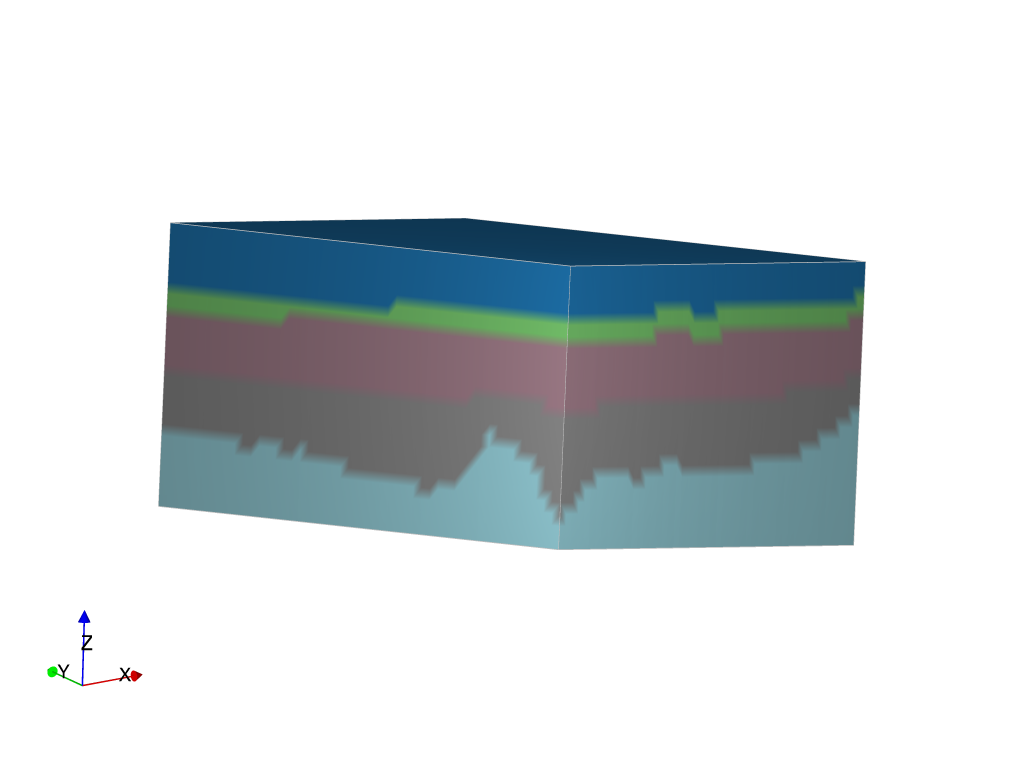

In [10]:
model.set_stratigraphic_column(stratigraphic_column)

viewer = LavaVuModelViewer(model)
viewer.add_model(cmap='tab20')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()
viewer.interactive()

2021-11-07 21:14:35,434 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-11-07 21:14:35,434 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box
2021-11-07 21:14:35,434 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Isovalue doesn't exist inside bounding box


Adding surfaces took 0.4612269401550293 seconds




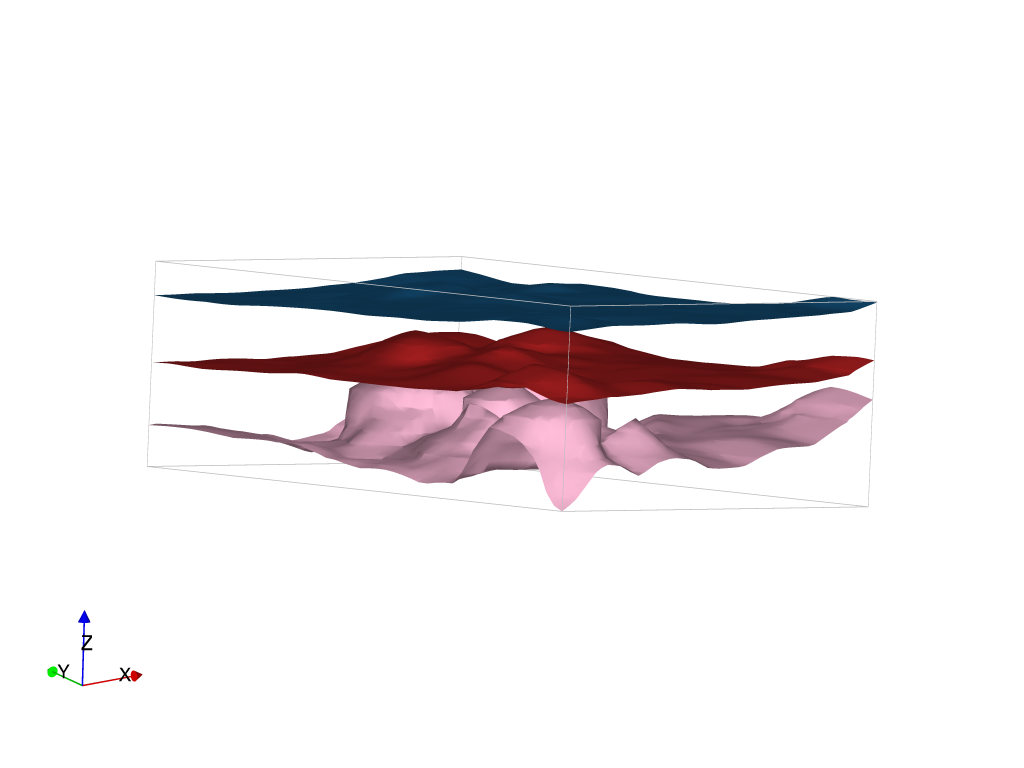

In [20]:
viewer = LavaVuModelViewer(model)
viewer.add_model_surfaces(cmap='tab20')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()
viewer.interactive()